In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\17634\Desktop\05-机器学习\02-机器学习代码\chapter10\data\otto\train.csv')
data

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       61878 non-null  int64 
 1   feat_1   61878 non-null  int64 
 2   feat_2   61878 non-null  int64 
 3   feat_3   61878 non-null  int64 
 4   feat_4   61878 non-null  int64 
 5   feat_5   61878 non-null  int64 
 6   feat_6   61878 non-null  int64 
 7   feat_7   61878 non-null  int64 
 8   feat_8   61878 non-null  int64 
 9   feat_9   61878 non-null  int64 
 10  feat_10  61878 non-null  int64 
 11  feat_11  61878 non-null  int64 
 12  feat_12  61878 non-null  int64 
 13  feat_13  61878 non-null  int64 
 14  feat_14  61878 non-null  int64 
 15  feat_15  61878 non-null  int64 
 16  feat_16  61878 non-null  int64 
 17  feat_17  61878 non-null  int64 
 18  feat_18  61878 non-null  int64 
 19  feat_19  61878 non-null  int64 
 20  feat_20  61878 non-null  int64 
 21  feat_21  61878 non-null  int64 
 22

In [4]:
data.target.value_counts()

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

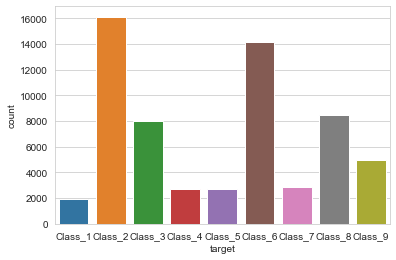

In [5]:
sns.countplot(data.target)

In [6]:
new1_data = data[:10000]
new1_data.shape

(10000, 95)

In [7]:
# 随机欠采样获取数据
# 首先需要确定特征值\标签值
y = data['target']
x = data.drop(['id', 'target'], axis=1)

#欠采样
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(x, y)
X_resampled.shape, y_resampled.shape

((17361, 93), (17361,))

<AxesSubplot:xlabel='target', ylabel='count'>

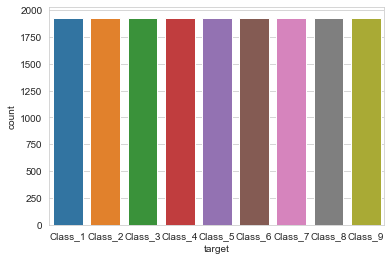

In [8]:
sns.countplot(y_resampled)

In [9]:
y_resampled.head()

0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
Name: target, dtype: object

In [10]:
## 把标签值转换为数字

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_resampled = le.fit_transform(y_resampled)
y_resampled

array([0, 0, 0, ..., 8, 8, 8])

In [11]:
# 分割数据
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

# 模型训练
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score=True)
rf.fit(x_train, y_train)

RandomForestClassifier(oob_score=True)

In [12]:
y_pre = rf.predict(x_test)
y_pre

array([8, 0, 6, ..., 6, 5, 1])

In [13]:
rf.score(x_test, y_test)

0.7860639216815434

In [14]:
rf.oob_score_

0.7605846774193549

<AxesSubplot:ylabel='count'>

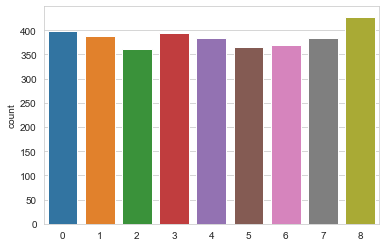

In [15]:
sns.countplot(y_pre)

In [16]:
# logloss模型评估
from sklearn.metrics import log_loss
log_loss(y_test, y_pre, eps=1e-15, normalize=True)

ValueError: y_true and y_pred contain different number of classes 9, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0 1 2 3 4 5 6 7 8]

In [17]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(sparse=False)

y_test1 = one_hot.fit_transform(y_test.reshape(-1, 1))
y_pre1 = one_hot.fit_transform(y_pre.reshape(-1, 1))

# logloss模型评估

log_loss(y_test1, y_pre1, eps=1e-15, normalize=True)

7.389090371845283

In [18]:
# 改变预测值的输出模式,让输出结果为百分占比,降低logloss值
y_pre_proba = rf.predict_proba(x_test)
y_pre_proba

array([[0.32, 0.  , 0.  , ..., 0.01, 0.02, 0.61],
       [0.56, 0.02, 0.03, ..., 0.12, 0.12, 0.04],
       [0.03, 0.26, 0.13, ..., 0.42, 0.04, 0.04],
       ...,
       [0.28, 0.04, 0.04, ..., 0.37, 0.03, 0.03],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.04, 0.45, 0.18, ..., 0.07, 0.  , 0.02]])

### 确定最优的n_estimators

In [20]:
# 确定n_estimators的取值范围
tuned_parameters = range(10, 200, 10)

# 创建添加accuracy的一个numpy
accuracy_t = np.zeros(len(tuned_parameters))
# 创建添加error的一个numpy
error_t = np.zeros(len(tuned_parameters))
# 调优过程实现
for j, one_parameter in enumerate(tuned_parameters):
    rf2 = RandomForestClassifier(n_estimators=one_parameter,
                                 max_depth=10,
                                 max_features=10,
                                 min_samples_leaf=10,
                                 oob_score=True,
                                 random_state=0,
                                 n_jobs=-1)

    rf2.fit(x_train, y_train)

    # 输出accuracy
    accuracy_t[j] = rf2.oob_score_

    # 输出log_loss
    y_pre = rf2.predict_proba(x_test)
    error_t[j] = log_loss(y_test, y_pre, eps=1e-15, normalize=True)

    print(error_t)

C:\Users\17634\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


[1.13236454 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


C:\Users\17634\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


[1.13236454 1.13021085 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.13236454 1.13021085 1.13409296 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.13236454 1.13021085 1.13409296 1.13075455 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.13236454 1.13021085 1.13409296 1.13075455 1.12415765 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.13236454 1.13021085 1.13409296 1.13075455 1.12415765 1.12240708
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.13236454 1.13021085 1.13409296 1.130754

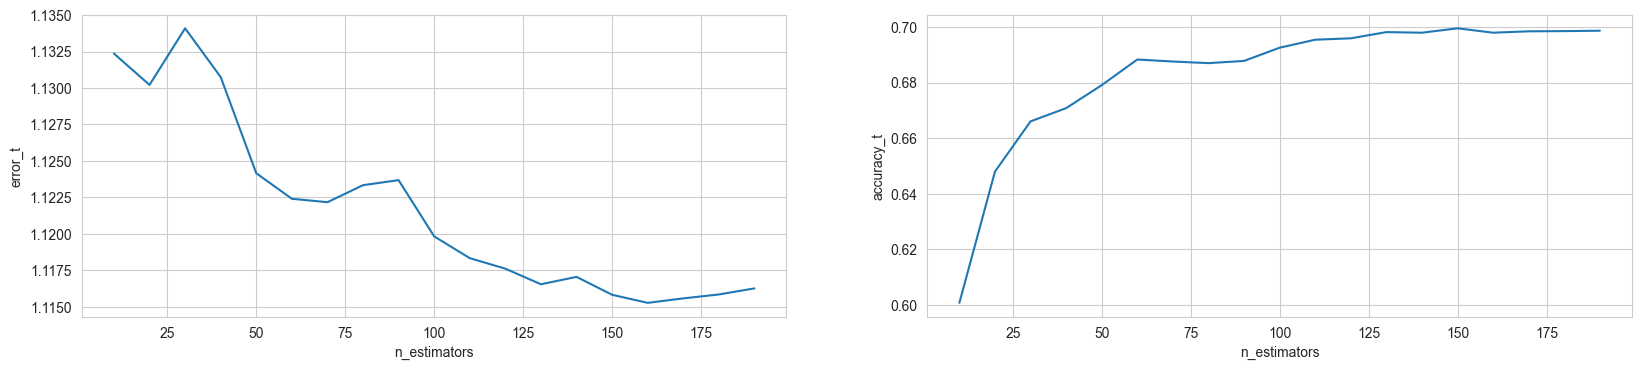

In [21]:
# 优化结果过程可视化
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), dpi=100)

axes[0].plot(tuned_parameters, error_t)
axes[1].plot(tuned_parameters, accuracy_t)

axes[0].set_xlabel("n_estimators")
axes[0].set_ylabel("error_t")
axes[1].set_xlabel("n_estimators")
axes[1].set_ylabel("accuracy_t")

axes[0].grid(True)
axes[1].grid(True)  # 最终n_estimators取175

### 确定最优的max_features

In [22]:

# 确定n_estimators的取值范围
tuned_parameters = range(5, 40, 5)

# 创建添加accuracy的一个numpy
accuracy_t = np.zeros(len(tuned_parameters))

# 创建添加error的一个numpy
error_t = np.zeros(len(tuned_parameters))

# 调优过程实现
for j, one_parameter in enumerate(tuned_parameters):
    rf2 = RandomForestClassifier(n_estimators=175,
                                 max_depth=10,
                                 max_features=one_parameter,
                                 min_samples_leaf=10,
                                 oob_score=True,
                                 random_state=0,
                                 n_jobs=-1)

    rf2.fit(x_train, y_train)

    # 输出accuracy
    accuracy_t[j] = rf2.oob_score_

    # 输出log_loss
    y_pre = rf2.predict_proba(x_test)
    error_t[j] = log_loss(y_test, y_pre, eps=1e-15, normalize=True)

    print(error_t[j])

1.2157317778139538
1.1162574312065359
1.087131228674992
1.066522048062617
1.0629550011673528
1.058832890779563
1.0629936111258251


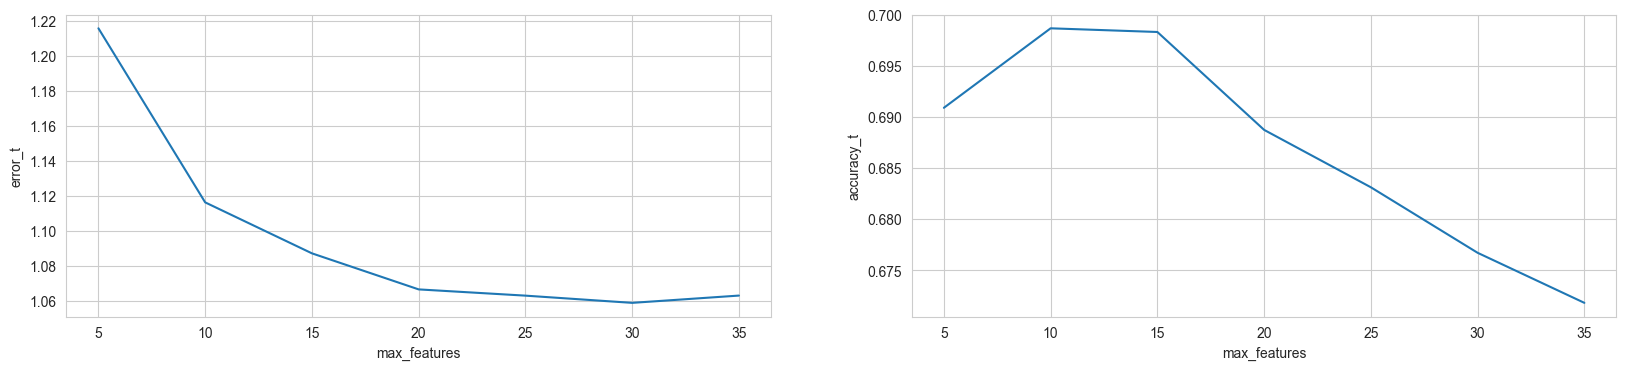

In [23]:
# 优化结果过程可视化
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), dpi=100)

axes[0].plot(tuned_parameters, error_t)
axes[1].plot(tuned_parameters, accuracy_t)

axes[0].set_xlabel("max_features")
axes[0].set_ylabel("error_t")
axes[1].set_xlabel("max_features")
axes[1].set_ylabel("accuracy_t")

axes[0].grid(True)
axes[1].grid(True) # 最终max_features取15

### 确定最优的max_depth

In [24]:

# 确定n_estimators的取值范围
tuned_parameters = range(10, 100, 10)

# 创建添加accuracy的一个numpy
accuracy_t = np.zeros(len(tuned_parameters))

# 创建添加error的一个numpy
error_t = np.zeros(len(tuned_parameters))

# 调优过程实现
for j, one_parameter in enumerate(tuned_parameters):
    rf2 = RandomForestClassifier(n_estimators=175,
                                 max_depth=one_parameter,
                                 max_features=15,
                                 min_samples_leaf=10,
                                 oob_score=True,
                                 random_state=0,
                                 n_jobs=-1)

    rf2.fit(x_train, y_train)

    # 输出accuracy
    accuracy_t[j] = rf2.oob_score_

    # 输出log_loss
    y_pre = rf2.predict_proba(x_test)
    error_t[j] = log_loss(y_test, y_pre, eps=1e-15, normalize=True)

    print(error_t[j])

1.087131228674992
0.8572066140241047
0.8343757656204591
0.8339034964632985
0.8338955686794663
0.8338955686794663
0.8338955686794663
0.8338955686794663
0.8338955686794663


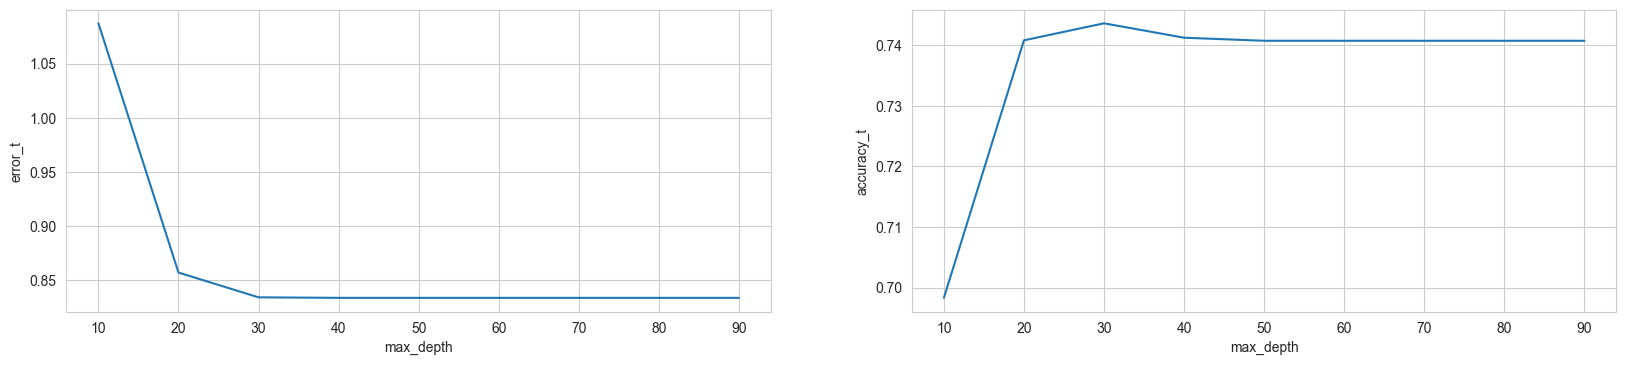

In [25]:
# 优化结果过程可视化
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), dpi=100)

axes[0].plot(tuned_parameters, error_t)
axes[1].plot(tuned_parameters, accuracy_t)

axes[0].set_xlabel("max_depth")
axes[0].set_ylabel("error_t")
axes[1].set_xlabel("max_depth")
axes[1].set_ylabel("accuracy_t")

axes[0].grid(True)
axes[1].grid(True) # 最终max_depth取30

### 确定最优的min_sample_leaf

In [26]:
# 确定n_estimators的取值范围
tuned_parameters = range(1, 10, 2)

# 创建添加accuracy的一个numpy
accuracy_t = np.zeros(len(tuned_parameters))

# 创建添加error的一个numpy
error_t = np.zeros(len(tuned_parameters))

# 调优过程实现
for j, one_parameter in enumerate(tuned_parameters):
    rf2 = RandomForestClassifier(n_estimators=175,
                                 max_depth=30,
                                 max_features=15,
                                 min_samples_leaf=one_parameter,
                                 oob_score=True,
                                 random_state=0,
                                 n_jobs=-1)

    rf2.fit(x_train, y_train)

    # 输出accuracy
    accuracy_t[j] = rf2.oob_score_

    # 输出log_loss
    y_pre = rf2.predict_proba(x_test)
    error_t[j] = log_loss(y_test, y_pre, eps=1e-15, normalize=True)

    print(error_t)

[0.70573981 0.         0.         0.         0.        ]
[0.70573981 0.74695456 0.         0.         0.        ]
[0.70573981 0.74695456 0.77873149 0.         0.        ]
[0.70573981 0.74695456 0.77873149 0.80417745 0.        ]
[0.70573981 0.74695456 0.77873149 0.80417745 0.82141713]


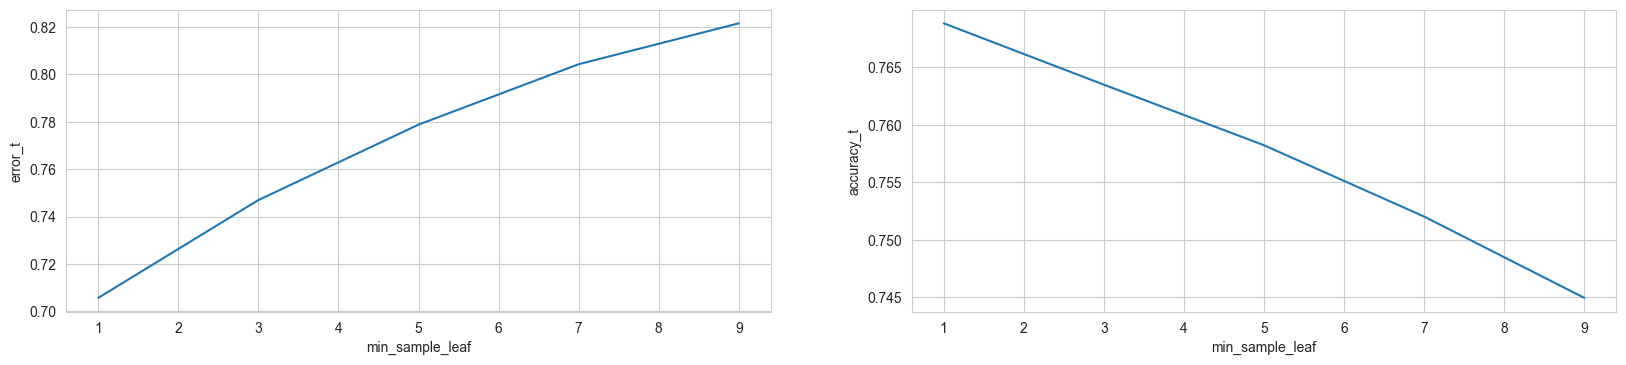

In [27]:
# 优化结果过程可视化
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), dpi=100)

axes[0].plot(tuned_parameters, error_t)
axes[1].plot(tuned_parameters, accuracy_t)

axes[0].set_xlabel("min_sample_leaf")
axes[0].set_ylabel("error_t")
axes[1].set_xlabel("min_sample_leaf")
axes[1].set_ylabel("accuracy_t")

axes[0].grid(True)
axes[1].grid(True) #最终min_sample_leaf取1

## 确定最优模型

n_estimators=175,

max_depth=30,

max_features=15,

min_samples_leaf=1,

In [28]:
rf3 = RandomForestClassifier(n_estimators=175, max_depth=30, max_features=15, min_samples_leaf=1,
                             oob_score=True, random_state=40, n_jobs=-1)

rf3.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, max_features=15, n_estimators=175,
                       n_jobs=-1, oob_score=True, random_state=40)

In [29]:
rf3.score(x_test, y_test)

0.7811690181399367

In [30]:
rf3.oob_score_

0.7675691244239631

In [31]:
y_pre_proba1 = rf3.predict_proba(x_test)

log_loss(y_test, y_pre_proba1)

0.715936628900219

## 生成提交数据

In [32]:
test_data = pd.read_csv(r'C:\Users\17634\Desktop\05-机器学习\02-机器学习代码\chapter10\data\otto\test.csv')
test_data

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144363,144364,0,0,0,0,0,0,0,0,0,...,0,0,2,1,1,0,0,0,0,0
144364,144365,0,0,0,0,0,0,0,0,0,...,0,1,4,1,11,0,0,0,0,0
144365,144366,0,1,0,0,0,0,1,1,0,...,0,1,3,1,1,0,0,1,0,0
144366,144367,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,1,0


In [33]:
test_data_drop_id = test_data.drop(["id"], axis=1)
test_data_drop_id

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144363,0,0,0,0,0,0,0,0,0,1,...,0,0,2,1,1,0,0,0,0,0
144364,0,0,0,0,0,0,0,0,0,0,...,0,1,4,1,11,0,0,0,0,0
144365,0,1,0,0,0,0,1,1,0,0,...,0,1,3,1,1,0,0,1,0,0
144366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,1,0


In [34]:
y_pre_test = rf3.predict_proba(test_data_drop_id)
y_pre_test

array([[2.31932773e-02, 5.26773619e-02, 1.31981156e-01, ...,
        2.89416858e-02, 5.71428571e-03, 2.28571429e-02],
       [8.57142857e-02, 3.42857143e-02, 5.14285714e-02, ...,
        2.28571429e-02, 3.14285714e-01, 2.85714286e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.71428571e-03, 1.14285714e-02, 0.00000000e+00],
       ...,
       [2.28571429e-02, 3.33543785e-01, 3.70705521e-01, ...,
        2.89607135e-02, 1.71858217e-02, 4.29645542e-05],
       [3.80952381e-04, 2.40984307e-01, 8.87406919e-02, ...,
        1.78921284e-02, 0.00000000e+00, 0.00000000e+00],
       [8.28295534e-03, 1.50934861e-01, 3.48664618e-01, ...,
        1.88666611e-01, 8.16326531e-05, 1.51060547e-03]])

In [35]:
result_data = pd.DataFrame(y_pre_test, columns=["Class_"+str(i) for i in range(1, 10)])
result_data

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,0.023193,0.052677,0.131981,0.723207,0.000000,0.011429,0.028942,0.005714,0.022857
1,0.085714,0.034286,0.051429,0.040000,0.000000,0.422857,0.022857,0.314286,0.028571
2,0.000000,0.000000,0.000000,0.005714,0.005714,0.971429,0.005714,0.011429,0.000000
3,0.017143,0.274286,0.342857,0.245714,0.000000,0.005714,0.011429,0.011429,0.091429
4,0.257220,0.000176,0.000000,0.000088,0.000000,0.000176,0.029347,0.195414,0.517580
...,...,...,...,...,...,...,...,...,...
144363,0.545101,0.025147,0.013367,0.053803,0.005941,0.098094,0.082059,0.024605,0.151882
144364,0.001668,0.071238,0.427555,0.350576,0.000835,0.000229,0.139953,0.005971,0.001975
144365,0.022857,0.333544,0.370706,0.226445,0.000216,0.000043,0.028961,0.017186,0.000043
144366,0.000381,0.240984,0.088741,0.652002,0.000000,0.000000,0.017892,0.000000,0.000000


In [ ]:
# result_data.insert(loc=0, column="id", value=test_data.id)
# result_data.to_csv("./data/otto/submission.csv", index=False)